# Regresion_Lineal (cont.)
## Ejemplo de Análisis de Regresión de una sola ecuación

In [ ]:
# !pip install LIBRERIA

In [1]:
# Dependencias
import pyreadstat #librería para leer formato ".dta"
import pandas as pd #librería para manipulación de datos
import numpy as np #Librería para operaciones matemáticas
import matplotlib #librería para graficar
from matplotlib import pyplot as plt #librería para graficar
import statsmodels.api as sm #librería para análisis estadístico
from IPython.display import Image # Para imagénes
from statsmodels.formula.api import ols # Para pruebas de hipotesis

#
import warnings
warnings.filterwarnings('ignore')

### Metadatos: La base de datos contiene 145 observaciones  de las siguientes variables:
**Datos de Demanda de Gasolina:**
* **totcost:** costs in 1970, MM USD

* **output:** output billion KwH
* **plabor:** price of labor
* **pfuel:** price of fuel
* **pkap:** price of capital

In [2]:
# Ruta al archivo:
dtafile = 'nerlove63.dta'
# La función read_dat devuelve dos objetos: el dataframe y los metadatos
dataframe, meta = pyreadstat.read_dta(dtafile)

In [3]:
dataframe.head(5)

,totcost,output,plabor,pfuel,pkap
0,0.082,2.0,2.09,17.900000,183.0
1,0.661,3.0,2.05,35.099998,174.0
2,0.990,4.0,2.05,35.099998,171.0
3,0.315,4.0,1.83,32.200001,166.0
4,0.197,5.0,2.12,28.600000,233.0


## Aplicación del Método de MCO: Retornos a Escala en la Industria Eléctrica
Considerando lo anterior plateamos la expresión:
$$ln(C_i) = \beta_1 +  \beta_2 ln(Q_i) + \beta_3 ln(p_{i1}) + \beta_4 ln(p_{i2}) + \beta_5 ln(p_{i3}) + \varepsilon_i$$

Donde:
$$\beta_1 = \mu$$

$$\beta_2 = \frac{1}{r}$$

$$\beta_3 = \frac{\alpha_1}{r}$$

$$\beta_4 = \frac{\alpha_2}{r}$$

$$\beta_5 = \frac{\alpha_3}{r}$$

De esta forma podemos decir que $y_i = ln(C_i)$ y que:
$$\mathbf{X}'_i = [1, ln(Q_i), ln(p_{i1}), ln(p_{i2}), ln(p_{i3})]$$


### Transformación de datos:

In [4]:
#Creamos la variable Ltotcost aplicando logaritmo a totcost y guardamos el resultado en la nueva columna Ltotcost
dataframe['Ltotcost'] = np.log(dataframe['totcost'])
dataframe['Loutput'] = np.log(dataframe['output'])
dataframe['Lplabor'] = np.log(dataframe['plabor'])
dataframe['Lpfuel'] = np.log(dataframe['pfuel'])
dataframe['Lpkap'] = np.log(dataframe['pkap'])
dataframe['avgcost'] = dataframe["totcost"]/dataframe["output"]
dataframe['One'] = 1

In [5]:
#
dataframe.head()

,totcost,output,plabor,pfuel,pkap,Ltotcost,Loutput,Lplabor,Lpfuel,Lpkap,avgcost,One
0,0.082,2.0,2.09,17.900000,183.0,-2.501036,0.693147,0.737164,2.884801,5.209486,0.041000,1
1,0.661,3.0,2.05,35.099998,174.0,-0.414001,1.098612,0.717840,3.558201,5.159055,0.220333,1
2,0.990,4.0,2.05,35.099998,171.0,-0.010050,1.386294,0.717840,3.558201,5.141664,0.247500,1
3,0.315,4.0,1.83,32.200001,166.0,-1.155183,1.386294,0.604316,3.471966,5.111988,0.078750,1
4,0.197,5.0,2.12,28.600000,233.0,-1.624552,1.609438,0.751416,3.353407,5.451038,0.039400,1


## Regresión base: 

In [6]:
# Definición de variables:
Y = dataframe["Ltotcost"]
X = dataframe[["One","Loutput", "Lplabor", "Lpfuel", "Lpkap"]]
#
X

,One,Loutput,Lplabor,Lpfuel,Lpkap
0,1,0.693147,0.737164,2.884801,5.209486
1,1,1.098612,0.717840,3.558201,5.159055
2,1,1.386294,0.717840,3.558201,5.141664
3,1,1.386294,0.604316,3.471966,5.111988
4,1,1.609438,0.751416,3.353407,5.451038
...,...,...,...,...,...
140,1,9.205931,0.518794,3.360375,5.313206
141,1,9.348100,0.806476,3.277145,5.017280
142,1,9.375516,0.751416,3.353407,4.997212
143,1,9.572132,0.837247,3.511545,5.356586


In [7]:
# Estimación:
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           4.82e-78
Time:                        08:08:13   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
One           -3.5265      1.774     -1.987      0.0

Estimadores:
$$\hat{\boldsymbol \beta} = (\mathbf{X'X})^{-1}\mathbf{X'Y}$$

In [8]:
#
est2.params

One       -3.526503
Loutput    0.720394
Lplabor    0.436341
Lpfuel     0.426517
Lpkap     -0.219888
dtype: float64

La especificación más común de la prueba de hipótesis en el análisis de regresión es:
$$H_0: \beta_k = 0$$
$$H_a: \beta_k \neq 0$$

Lo que en términos de una prueba $t$ es la siguiente:
$$t = \frac{\hat{\beta}_k - 0}{\sqrt{\hat{\sigma}^2 (\mathbf{X}'\mathbf{X})^{-1}_{kk}}} \sim t_{n - k}$$

In [9]:
#
est2.tvalues

One        -1.987471
Loutput    41.244483
Lplabor     1.499209
Lpfuel      4.249483
Lpkap      -0.647819
dtype: float64

La hipotésis nula de una prueba global se puede escribir como:
$$H_0: \beta_1 = \beta_2 = \ldots = \beta_K = 0$$
$$H_a: No H_0$$

Esta prueba se le conoce como prueba global, ya que prueba si en conjunto todas las variables independientes tienen un efecto nulo en $\mathbf{Y}$. Notemos que la prueba implica que la estadística $F$ de prueba será:
$$F = \frac{(\mathbf{R} \boldsymbol{\hat{\beta}} - \mathbf{r})'[\mathbf{R} \hat{\sigma}^2 (\mathbf{X}'\mathbf{X})^{-1}\mathbf{R}']^{-1}(\mathbf{R} \boldsymbol{\hat{\beta}} - \mathbf{r})}{J} \sim F_{J, n - K}$$    

La matriz $\mathbf{R}$ y vector $\mathbf{r}$:
$$\mathbf{R} = \left[ 
            \begin{array}{c c c c}
                1 & 0 & \ldots & 0 \\ 0 & 1 & \ldots & 0 \\ 0 & 0 & \ldots & 0 \\ \vdots & \vdots & \cdots & \vdots \\ 0 & 0 & \ldots & 1 \\
            \end{array}
            \right]$$

$$\mathbf{r} = \left[ 
            \begin{array}{c}
                0 \\ 0 \\ 0 \\ \vdots \\ 0 \\
            \end{array} 
            \right]$$


In [10]:
#
est2.fvalue

437.68628137228876

Alternativamente:

In [11]:
#
R = np.array(([0,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]))
R

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [12]:
#
print(est2.f_test(R))

<F test: F=array([[437.68628137]]), p=4.819371284369683e-78, df_denom=140, df_num=4>


En el caso que nos ocupa queremos probar si la suma de los coeficientes asociados los factores productivos es 1, es decir, la función de costos exibe rendimientos constantes a escala:
$$H_0: \beta_3 + \beta_4 + \beta_5 = 1$$
$$H_1: \beta_3 + \beta_4 + \beta_5 \neq 1$$

Existen dos alternativas para probar la hipótesis. Partamos de que:
La matriz $\mathbf{R}$ y vector $\mathbf{r}$:
$$\mathbf{R} = \left[ 
            \begin{array}{c c c c c}
                0 & 0 & 1 & 1 & 1 
            \end{array}
            \right]$$

$$\mathbf{r} = 1$$


In [13]:
#
formula = 'Ltotcost ~  One + Loutput + Lplabor + Lpfuel + Lpkap'
results = ols(formula, dataframe).fit()
# Se pueden incluir tantas restricciones queramos, agregando una coma (,) segido de la restricción
hypotheses = 'Lplabor + Lpfuel + Lpkap = 1'

$$H_0 = \beta_3 + \beta_4 + \beta_5 = 1$$
$$H_0 = \beta_3 + \beta_4 + \beta_5 - 1 = 0$$

Lo que en términos de una prueba $t$ es la siguiente:
$$t = \frac{\mathbf{R} \hat{\beta} - 1}{\sqrt{\hat{\sigma}^2 R (\mathbf{X}'\mathbf{X})^{-1} R'}} \sim t_{n - k}$$

In [14]:
# 1:
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6430      0.471     -0.757      0.450      -0.289       1.575


$$F = \frac{(\mathbf{R} \boldsymbol{\hat{\beta}} - \mathbf{1})'[\mathbf{R} \hat{\sigma}^2 (\mathbf{X}'\mathbf{X})^{-1}\mathbf{R}']^{-1}(\mathbf{R} \boldsymbol{\hat{\beta}} - \mathbf{1})}{1} \sim F_{1, n - K}$$    


In [15]:
# 2:
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[0.57366053]]), p=0.4500808771656396, df_denom=140, df_num=1>


$$H_0 = \beta_3 + \beta_4 + \beta_5 = 1, \beta_2 = 0$$
$$H_1 = No H_0$$

In [16]:
# Otro ejemplo: 
hypotheses_2 = 'Lplabor + Lpfuel + Lpkap = 1, Loutput = 0'
f_test = results.f_test(hypotheses_2)
print(f_test)

<F test: F=array([[851.95263328]]), p=4.238968262667809e-79, df_denom=140, df_num=2>


In [17]:
print(results)

Cómo se ve la curva de costos medios estimados:

In [18]:
# Rcuperamos de la regresión el valor del Log del costo estimado
LY_pred = est2.predict(X)
# Anti-log:
Y = np.exp(LY_pred)
# Colocamos en el Data Frame:
dataframe['totcost_e'] = Y
dataframe['avgcost_e'] = dataframe["totcost_e"]/dataframe["output"]
dataframe.head()

,totcost,output,plabor,pfuel,pkap,Ltotcost,Loutput,Lplabor,Lpfuel,Lpkap,avgcost,One,totcost_e,avgcost_e
0,0.082,2.0,2.09,17.900000,183.0,-2.501036,0.693147,0.737164,2.884801,5.209486,0.041000,1,0.072759,0.036380
1,0.661,3.0,2.05,35.099998,174.0,-0.414001,1.098612,0.717840,3.558201,5.159055,0.220333,1,0.130207,0.043402
2,0.990,4.0,2.05,35.099998,171.0,-0.010050,1.386294,0.717840,3.558201,5.141664,0.247500,1,0.160805,0.040201
3,0.315,4.0,1.83,32.200001,166.0,-1.155183,1.386294,0.604316,3.471966,5.111988,0.078750,1,0.148473,0.037118
4,0.197,5.0,2.12,28.600000,233.0,-1.624552,1.609438,0.751416,3.353407,5.451038,0.039400,1,0.164058,0.032812


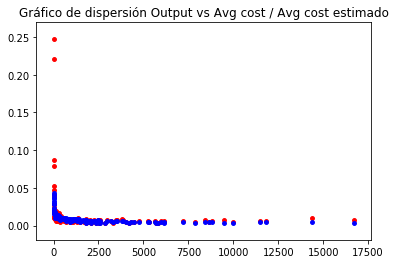

In [19]:
# graficamos resultados:
plt.scatter(dataframe.output, dataframe.avgcost, s = 15, color ="red")
plt.scatter(dataframe.output, dataframe.avgcost_e, s = 15, color ="blue")
plt.title("Gráfico de dispersión Output vs Avg cost / Avg cost estimado")
#
plt.show()

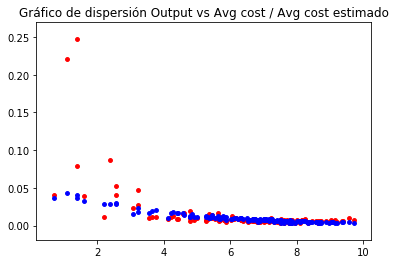

In [20]:
# graficamos resultados:
plt.scatter(dataframe.Loutput, dataframe.avgcost, s = 15, color ="red")
plt.scatter(dataframe.Loutput, dataframe.avgcost_e, s = 15, color ="blue")
plt.title("Gráfico de dispersión Output vs Avg cost / Avg cost estimado")
#
plt.show()

# Ejercicio:

Estimar:
$$ln(C_i) = \beta_1 +  \beta_2 ln(Q_i) + \beta_2 (ln(Q_i))^2 + \beta_3 ln(p_{i1}) + \beta_4 ln(p_{i2}) + \beta_5 ln(p_{i3}) + \varepsilon_i$$

Probar si:
$$H_0: \beta_3 + \beta_4 + \beta_5 = 1$$
$$H_1: \beta_3 + \beta_4 + \beta_5 \neq 1$$


In [ ]:
dataframe.head()

In [ ]:
dataframe["Loutput_2"] = dataframe["Loutput"]**2

In [ ]:
dataframe.head()

In [ ]:
# Definición de variables:
Y = dataframe["Ltotcost"]
X = dataframe[["One", ]]
#
X

In [ ]:
# Estimación:
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())

In [ ]:
formula = 'Ltotcost ~  One + '
results = ols(formula, dataframe).fit()

# Se pueden incluir tantas restricciones queramos, agregando una coma (,) segido de la restricción
hypotheses = ' +  +  = 1'
t_test = results.t_test(hypotheses)
print(t_test)